In [179]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [180]:
data = np.load("../test.npy")

In [349]:
from scipy import misc, signal
import numpy as np

def imsharpen(im):
    sharpen_kernel = np.array([[0, -1, 0], [-1, 7, -1], [0, -1, 0]])
    im_sharpened = np.ones(im.shape)
    im_sharpenened = signal.convolve2d(im, sharpen_kernel,  mode='same', boundary="symm")
    return im_sharpenened

In [350]:
def recover_small(arr, thresh, thresh_p):
    stacked = np.copy(arr)
    for window_x in range(2, stacked.shape[0]-2, 1):
        for window_y in range(2, stacked.shape[1]-2, 1):
            l, r, u, d =  False, False, False, False
            cur_window = stacked[window_x-2:window_x+3, window_y-2:window_y+3]
            hor_vert_neighbors = False
            if (cur_window[2, 2] > thresh and
                cur_window[2, 2] < thresh_p):
                if cur_window[3, 2] > thresh * 2 and cur_window[4, 2] < thresh * 2 :
                    hor_vert_neighbors = True
                    r = True
                if cur_window[1, 2] > thresh * 2 and cur_window[2, 0] < thresh * 2:
                    hor_vert_neighbors = True
                    l = True
                if cur_window[2, 3] > thresh * 2 and cur_window[2, 4] < thresh * 2:
                    hor_vert_neighbors = True
                    d = True
                if cur_window[2, 1] > thresh * 2 and cur_window[2, 0] < thresh * 2:
                    hor_vert_neighbors = True
                    u = True
            passes = False
            if r and not l:
                passes = True
            if l and not r:
                passes = True
            if d and not u:
                passes = True
            if u and not d:
                passes = True

            if passes:
                if r:
                    if cur_window[1, 1] < thresh * 2 and cur_window[1, 3] < thresh * 2:
                        stacked[window_x, window_y] = 1. #(thresh_p + 0.01)

                if l:
                    if cur_window[3, 1] < thresh * 2 and cur_window[3, 3] < thresh * 2:
                        stacked[window_x, window_y] = 1. #(thresh_p + 0.01)

                if u:
                    if cur_window[1, 3] < thresh * 2 and cur_window[3, 3] < thresh * 2:
                        stacked[window_x, window_y] = 1. #(thresh_p + 0.01)

                if d:
                    if cur_window[1, 1] < thresh * 2 and cur_window[3, 1] < thresh * 2:
                        stacked[window_x, window_y] = 1. #(thresh_p + 0.01)
    return stacked

In [361]:
def recover_new(arr, thresh):
    stacked = np.copy(arr)
    for window_x in range(2, stacked.shape[0]-2, 1):
        for window_y in range(2, stacked.shape[1]-2, 1):
            #
            five_w = stacked[window_x-2:window_x+3, window_y-2:window_y+3]
            three_w = stacked[window_x-1:window_x+2, window_y-1:window_y+2]
            
            n_five_above = len(five_w[np.argwhere(five_w > 0.1)])
            n_three_above = len(three_w[np.argwhere(three_w > 0.1)])
            
            n_five_below = len(five_w[np.argwhere(five_w < thresh)])
            
            
            if n_five_below >= 24:                 # if less than 2 of the 5x5 are positive
                if n_three_above >= 2:             # and at least 2 of the 3x3 are above 0.1
                    if n_three_above <= (n_five_above + 4):  # and less than half of the outer border is above 0.1
                        if np.argmax(three_w) == 4:          # and the center of the 3 x 3 is the largest
                            stacked[window_x, window_y] = -1.
    stacked[np.where(stacked == -1)] = 1.
    return stacked

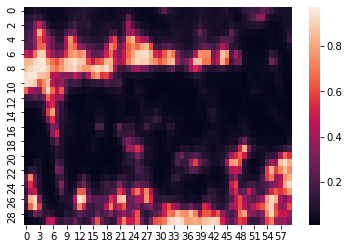

In [362]:
sns.heatmap(data)

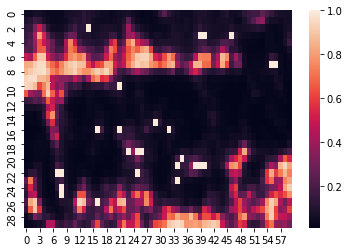

In [363]:
data2 = recover_new(data, 0.5)
sns.heatmap(data2)

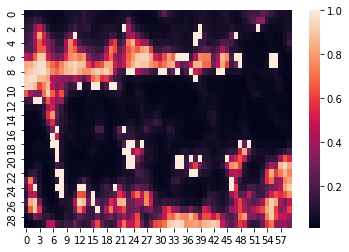

In [359]:
data3 = recover_small(data, 0.1, 0.5)
sns.heatmap(data3)

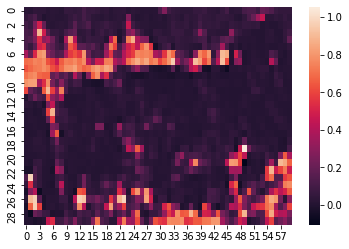

In [360]:
data3 = imsharpen(data)
sns.heatmap(( data3 / 4))